# GARCH Model

## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return LR, p

## Creating Returns

In [7]:
df['returns'] = df.market_value.pct_change(1)*100

## Creating Squared Returns

In [8]:
df['sq_returns'] = df.returns.mul(df.returns)

In [9]:
df.head()

,market_value,returns,sq_returns
date,,,
1994-01-07,3445.98,NaN,NaN
1994-01-10,3440.58,-0.156704,0.024556
1994-01-11,3413.77,-0.779229,0.607198
1994-01-12,3372.02,-1.222988,1.495700
1994-01-13,3360.01,-0.356166,0.126854


## Returns vs Squared Returns

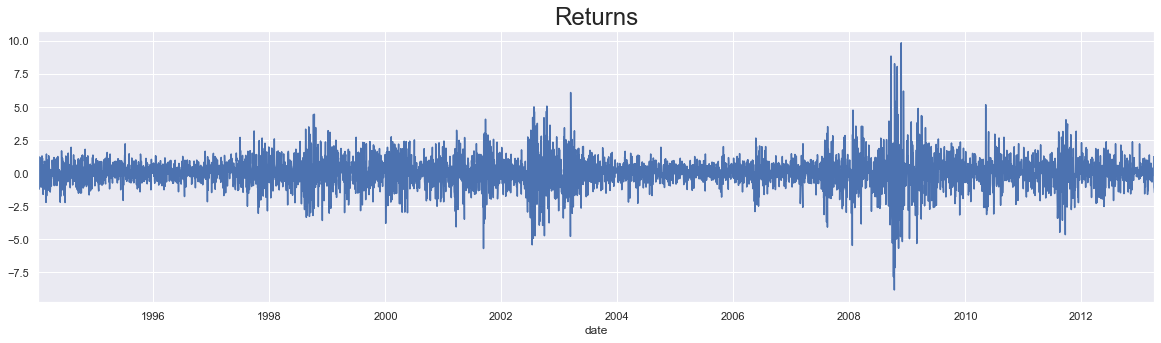

In [10]:
# displaty the two sets
df.returns.plot(figsize=(20,5))
plt.title("Returns", size=24)
plt.show()

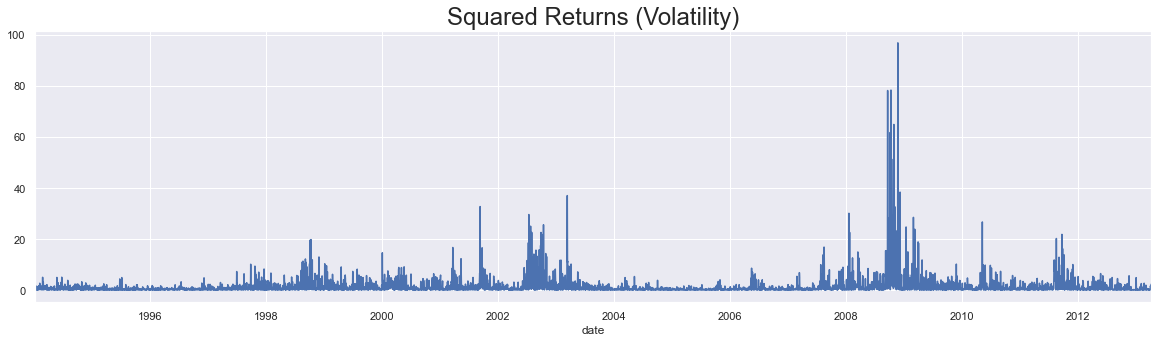

In [11]:
# displaty the two sets
df.sq_returns.plot(figsize=(20,5))
plt.title("Squared Returns (Volatility)", size=24)
plt.show()

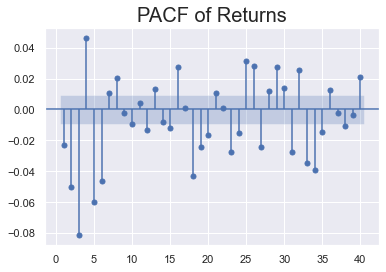

In [12]:
# Plot the PACF
sgt.plot_pacf(df.returns[1:], lags=40, alpha=0.5, zero=False, method=('ols'))
plt.title("PACF of Returns", size=20)
plt.show()

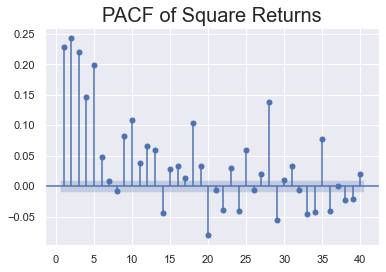

In [13]:
# Plot the PACF
sgt.plot_pacf(df.sq_returns[1:], lags=40, alpha=0.5, zero=False, method=('ols'))
plt.title("PACF of Square Returns", size=20)
plt.show()

We can see that the first six lags are significant. Such high significant values of autocorrelation amongs the first few lags, suggests that there tend to be short term trends in variance ("clustering").

### GARCH(1,1) Model with Serially Uncorrelated Data

In [22]:
# import library
from arch import arch_model

# build model
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p=1, q=1)
results_garch_1_1 = model_garch_1_1.fit(update_freq=5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712869697414
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478416067
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366189876
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Wed, Jun 22 2022   Df Residuals:                     5019
Time:                        10:54:48   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

The LLF value is much greater than even the ARCH(12) model. This suggests that including past values as a form of baseline provides much greater accuracy.

## Higher Lag GARCH Models

#### It has been mathematically proven that no higher-order GARCH models outperform the GARCH(1,1) when it comes to variance of market returns. This is due to the recursive nature in which the past conditional variances are computed.

### GARCH(1,2)

In [23]:
# build model
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p=1, q=2)
results_garch_1_2 = model_garch_1_2.fit(update_freq=5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 6974.174338061595
Iteration:     10,   Func. Count:     71,   Neg. LLF: 6970.058392236019
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366267055
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13950.1
Method:            Maximum Likelihood   BIC:                           13982.7
                                        No. Observations:                 5020
Date:                Wed, Jun 22 2022   Df Residuals:                     5019
Time:                        11:05:02   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.184e-02      3.938  8.219e-05 [2.341e-02,6.982e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  2.908e-03      3.760  1.696e-04 [5.236e-03,1.663e-02]
alpha[1]       0.0835  1.189e-02      7.019  2.233e-12   [6.017e-02,  0.107]
beta[1]        0.9089      0.188      4.845  1.269e-06     [  0.541,  1.277]
beta[2]    3.7130e-09      0.180  2.065e-08      1.000     [ -0.352,  0.352]
============================================================================

Covariance estimator: robust
"""

Notice that $\beta_{2}=1.0$. This is a case of perfect collinearity. All the explanatory power of the conditional variance two periods ago is already captured by the varianc from the last period.

### GARCH(2,1)

In [24]:
# build model
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p=2, q=1)
results_garch_2_1 = model_garch_2_1.fit(update_freq=5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 8793.711867692436
Iteration:     10,   Func. Count:     76,   Neg. LLF: 6967.731247505904
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6967.731020076308
            Iterations: 12
            Function evaluations: 87
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6967.73
Distribution:                  Normal   AIC:                           13945.5
Method:            Maximum Likelihood   BIC:                           13978.1
                                        No. Observations:                 5020
Date:                Wed, Jun 22 2022   Df Residuals:                     5019
Time:                        11:07:35   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.187e-02      3.922  8.780e-05 [2.329e-02,6.982e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0129  4.097e-03      3.158  1.589e-03  [4.908e-03,2.097e-02]
alpha[1]       0.0547  1.665e-02      3.286  1.017e-03  [2.208e-02,8.735e-02]
alpha[2]       0.0389  2.345e-02      1.659  9.709e-02 [-7.056e-03,8.488e-02]
beta[1]        0.8974  1.712e-02     52.415      0.000      [  0.864,  0.931]
=============================================================================

Covariance estimator: robust
"""

Notice that $\alpha_{2}$ is not significantly different from 0 at the 5% confidence level. Hence, the model fails.

#### The GARCH(1,1) is our best model so far.